In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# to initialize an empty tensor
x = torch.empty(3) #1d array with 3 elements
x1 = torch.empty(2,4) # 2d array with 4 elements
print(x1)

tensor([[ 6.3752e-21,  7.2307e-43, -1.0676e+09,  7.7071e-44],
        [ 0.0000e+00,  0.0000e+00,  2.1019e-44,  0.0000e+00]])


In [5]:
x = torch.randn(10)
# print(x)
# print(x.size())

print(torch.randn(2,3,6))

tensor([[[-0.9130,  0.6694,  0.0352,  0.8075, -0.7906, -0.2671],
         [-0.0972, -0.4212, -0.1027, -0.6036,  0.7258,  1.5739],
         [ 0.4092,  0.9395,  1.5238, -0.9278,  0.0197,  0.6588]],

        [[-0.0793,  0.3664,  1.1830,  0.3874,  0.6394, -2.1631],
         [ 1.7529,  0.0521,  1.4501,  0.0561, -0.4085, -0.2126],
         [ 2.2228, -0.9224, -0.1044,  0.0709, -1.0406,  0.0141]]])


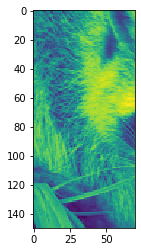

In [32]:
# Converting image data to tensor

#from skimage.transform import resize
# from scipy import misc

img = misc.face()
# print(img.dtype)
img = resize(img,(256,256))


img_tensor = torch.Tensor(img)
# print(img_tensor.shape)
# plt.imshow(img_tensor)

# channel_0 = img_tensor[:,:,0]
# print(channel_0.shape)
# plt.imshow(channel_0)

img_slice = img_tensor[25:175,60:130,0]
plt.imshow(img_slice)
# plt.show()


AssertionError: Torch not compiled with CUDA enabled

In [10]:
# creating tensors with random values
x2 = torch.rand(2,3)
print(x2)

# creating tensors consist of ony zeros
x3 = torch.zeros(2,4,dtype=torch.int)
print(x3)

# for ones use torch.ones

tensor([[0.8646, 0.5464, 0.2112],
        [0.4181, 0.1885, 0.7397]])
tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)


In [12]:
# perform various operations on tensors
a = torch.rand(2,2)
b = torch.rand(2,2)
print(torch.add(a,b))

# doing inplace addition
b.add_(a)
print(b)

tensor([[1.4996, 0.1718],
        [0.2043, 0.9023]])
tensor([[1.4996, 0.1718],
        [0.2043, 0.9023]])


In [17]:
import numpy as np
# converting tensors into numpy arr and vice versa
c = a.numpy()
# here c and a are pointing to same memory location
# so if you update tensor a , numpy arr c will also get updated
print(c)

d = torch.from_numpy(c)
print(d)

[[3.636073  3.144846 ]
 [3.0905156 3.2753701]]
tensor([[3.6361, 3.1448],
        [3.0905, 3.2754]])


In [52]:
# to calculate gradients for torch tensors

#x = torch.randn(3,requires_grad=True)
#print(x)

#y = x + 2
#print(y)

#z = y*y+2
#print(z)

#z = z.mean()

# if output is not a scalar value then we must provide a vector of size equal to z
#v = torch.tensor([0.2,0.89,0.043],dtype=torch.float32)
#z.backward(v)

#print(x.grad)

# if we want to change requires_grad=False once assigned as true

#x.requires_grad_(False) #method1
#print(x)

#y = x.detach() #method2
#print(y)

#method3
#with torch.no_grad():
    #y = x+2
    #print(y)
    
# to empty the gradients
#x.grad.zero_()

tensor([0., 0., 0.])

In [3]:
# Backpropogation in Pytorch
x = torch.tensor(1.0) #input
y = torch.tensor(2.0) #output

w = torch.tensor(1.0,requires_grad=True) #weight

#forward pass
ypred = w*x #predicted output

#calculating loss using mean square error
loss = (ypred-y)**2

# backward pass
loss.backward()
print(w.grad)

#update weights and continue with above steps

tensor(-2.)


In [5]:
import numpy as np

# consider a linear regression eqn : Y=w*X

X = np.array([1,2,3,4],dtype=np.float32)
Y = np.array([2,4,6,8],dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w*x

# calculating loss
def loss(y_actual,y_predicted):
    return ((y_predicted-y_actual)**2).mean()

#gradient
# MSE: z=1/N * (w*X - Y)**2
# dz/dw = 1/N 2X * (w*X-Y) , where * is the dot product
def gradients(x,y_actual,y_predicted):
    return np.dot(2*x,y_predicted-y_actual).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 30

for epoch in range(n_iters):
    y_pred = forward(X)
    
    l = loss(Y,y_pred)
    
    dz = gradients(X,Y,y_pred)
    
    w -= learning_rate*dz
    
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.6f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.000000
epoch 2: w = 1.680, loss = 4.799999
epoch 3: w = 1.872, loss = 0.768000
epoch 4: w = 1.949, loss = 0.122880
epoch 5: w = 1.980, loss = 0.019661
epoch 6: w = 1.992, loss = 0.003146
epoch 7: w = 1.997, loss = 0.000503
epoch 8: w = 1.999, loss = 0.000081
epoch 9: w = 1.999, loss = 0.000013
epoch 10: w = 2.000, loss = 0.000002
epoch 11: w = 2.000, loss = 0.000000
epoch 12: w = 2.000, loss = 0.000000
epoch 13: w = 2.000, loss = 0.000000
epoch 14: w = 2.000, loss = 0.000000
epoch 15: w = 2.000, loss = 0.000000
epoch 16: w = 2.000, loss = 0.000000
epoch 17: w = 2.000, loss = 0.000000
epoch 18: w = 2.000, loss = 0.000000
epoch 19: w = 2.000, loss = 0.000000
epoch 20: w = 2.000, loss = 0.000000
epoch 21: w = 2.000, loss = 0.000000
epoch 22: w = 2.000, loss = 0.000000
epoch 23: w = 2.000, loss = 0.000000
epoch 24: w = 2.000, loss = 0.000000
epoch 25: w = 2.000, loss = 0.000000
epoch 26: w = 2.000, loss = 0.000000
epoch

In [7]:
# Implementing above steps using torch
import torch 
X = torch.tensor([1,2,3,4],dtype=torch.float32)
Y = torch.tensor([2,4,6,8],dtype=torch.float32)

w = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

def forward(x):
    return w*x

def loss(y_actual,y_predicted):
    return ((y_predicted-y_actual)**2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 30

for epoch in range(n_iters):
    y_pred = forward(X)
    
    l = loss(Y,y_pred)
    
    l.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
    
    w.grad.zero_()
    
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.6f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.000000
epoch 2: w = 0.555, loss = 21.674999
epoch 3: w = 0.772, loss = 15.660188
epoch 4: w = 0.956, loss = 11.314487
epoch 5: w = 1.113, loss = 8.174717
epoch 6: w = 1.246, loss = 5.906232
epoch 7: w = 1.359, loss = 4.267253
epoch 8: w = 1.455, loss = 3.083090
epoch 9: w = 1.537, loss = 2.227532
epoch 10: w = 1.606, loss = 1.609392
epoch 11: w = 1.665, loss = 1.162786
epoch 12: w = 1.716, loss = 0.840112
epoch 13: w = 1.758, loss = 0.606981
epoch 14: w = 1.794, loss = 0.438544
epoch 15: w = 1.825, loss = 0.316848
epoch 16: w = 1.851, loss = 0.228923
epoch 17: w = 1.874, loss = 0.165397
epoch 18: w = 1.893, loss = 0.119499
epoch 19: w = 1.909, loss = 0.086338
epoch 20: w = 1.922, loss = 0.062379
epoch 21: w = 1.934, loss = 0.045069
epoch 22: w = 1.944, loss = 0.032562
epoch 23: w = 1.952, loss = 0.023526
epoch 24: w = 1.960, loss = 0.016998
epoch 25: w = 1.966, loss = 0.012281
epoch 26: w = 1.971, loss = 0.008873
ep

In [15]:
# Building entire nodel using torch
# replacing
import torch 
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test = torch.tensor([5],dtype=torch.float32)

n_samples,n_features = X.shape

input_size = n_features
output_size = n_features

#w = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)
model = nn.Linear(input_size,output_size)
#alternate way
'''
class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        return self.lin(x)
    
model = LinearRegression(input_size,output_size)
'''
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# training
learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
    y_pred = model(X)
    
    l = loss(Y,y_pred)
    
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if epoch % 1 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.6f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = 0.126
epoch 1: w = 0.314, loss = 29.109375
epoch 2: w = 0.560, loss = 20.218653
epoch 3: w = 0.765, loss = 14.049446
epoch 4: w = 0.936, loss = 9.768644
epoch 5: w = 1.079, loss = 6.798168
epoch 6: w = 1.198, loss = 4.736897
epoch 7: w = 1.297, loss = 3.306506
epoch 8: w = 1.380, loss = 2.313870
epoch 9: w = 1.449, loss = 1.624986
epoch 10: w = 1.506, loss = 1.146866
epoch 11: w = 1.554, loss = 0.814994
epoch 12: w = 1.594, loss = 0.584600
epoch 13: w = 1.628, loss = 0.424620
epoch 14: w = 1.656, loss = 0.313500
epoch 15: w = 1.679, loss = 0.236283
epoch 16: w = 1.699, loss = 0.182592
epoch 17: w = 1.715, loss = 0.145226
epoch 18: w = 1.729, loss = 0.119187
epoch 19: w = 1.741, loss = 0.101009
epoch 20: w = 1.751, loss = 0.088287
epoch 21: w = 1.759, loss = 0.079350
epoch 22: w = 1.766, loss = 0.073041
epoch 23: w = 1.772, loss = 0.068555
epoch 24: w = 1.777, loss = 0.065336
epoch 25: w = 1.781, loss = 0.062996
epoch 26: w = 1.785, loss = 0.061267
epo

In [49]:
##### Implementing Linear regression using torch #####

data = pd.read_csv("C:\\Users\\anike\\Documents\\python\Salary_Data.csv")
X_numpy = np.asarray(data['YearsExperience'])
y_numpy  = np.asarray(data['Salary'])

X = torch.from_numpy(X_numpy.astype(np.float32))
X = X.view(X.shape[0],1)
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples,n_features = X.shape
#continued in next cell

In [50]:
input_size = n_features
output_size = 1
l_rate=0.009
model = nn.Linear(input_size,output_size)

loss = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(),lr=l_rate)

n_iters = 50
for epoch in range(n_iters):
    y_pred = model(X)
    
    l = loss(y_pred,y)
    
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {l.item():.4f}')

#continued in next cell

epoch: 1, loss = 6502960128.0000
epoch: 11, loss = 145340336.0000
epoch: 21, loss = 136961232.0000
epoch: 31, loss = 129197680.0000
epoch: 41, loss = 122004344.0000


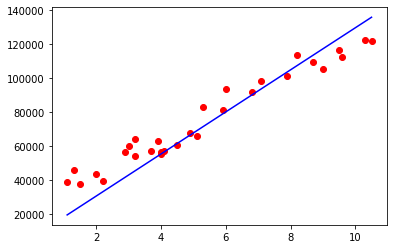

In [51]:
predicted = model(X).detach()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()

In [27]:
### Logistic Regression using pytorch ###
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('C:\\Users\\anike\\Desktop\\Machine Learning\\Logistic Regression\ChurnData.csv')

X = data[[ 'tenure', 'age', 'income', 'ed', 'employ', 'custcat']].values
y = data['churn'].values

n_samples,n_features = X.shape

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)


class LogisticRegression(nn.Module):
    def __init__(self,n_input_fea):
        super(LogisticRegression,self).__init__()
        #define layers
        self.linear = nn.Linear(n_input_fea,1)
    
    def forward(self,x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

l_rate = 0.066
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = l_rate)

n_iters = 150

for epoch in range(n_iters):
    y_predicted = model(X_train)
    
    l = loss(y_predicted,y_train)
    
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {l.item():.4f}')
        
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_class = y_predicted.round()
    acc = y_predicted_class.eq(y_test).sum()/float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')


epoch: 1, loss = 0.8242
epoch: 11, loss = 0.6771
epoch: 21, loss = 0.5974
epoch: 31, loss = 0.5534
epoch: 41, loss = 0.5274
epoch: 51, loss = 0.5107
epoch: 61, loss = 0.4993
epoch: 71, loss = 0.4910
epoch: 81, loss = 0.4848
epoch: 91, loss = 0.4800
epoch: 101, loss = 0.4761
epoch: 111, loss = 0.4730
epoch: 121, loss = 0.4704
epoch: 131, loss = 0.4682
epoch: 141, loss = 0.4663
accuracy = 0.7833
